In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("owid-covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210208,ZWE,Africa,Zimbabwe,2022-08-16,256561.0,17.0,10.143,5588.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210209,ZWE,Africa,Zimbabwe,2022-08-17,256565.0,4.0,10.429,5588.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210210,ZWE,Africa,Zimbabwe,2022-08-18,256579.0,14.0,9.429,5589.0,1.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210211,ZWE,Africa,Zimbabwe,2022-08-19,256596.0,17.0,10.571,5589.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## Подготовка данных

In [ ]:
df = data[data['icu_patients_per_million'].notna()]

In [ ]:
df['date']= pd.to_datetime(df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million',
       'avg_icu_patients', 'avg_icu_patients_per_million', 'avg_hosp_patients',
       'avg_hosp_patients_per_million', 'avg_positive_rate',
       'avg_tests_per_case', 'avg_stringency_index']]

In [ ]:
df[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']] = df[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']].groupby(df.location).apply(lambda group: group.interpolate())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df[['avg_icu_patients',
       'avg_icu_patients_per_million', 'avg_hosp_patients',
       'avg_hosp_patients_per_million', 'avg_positive_rate', 'avg_tests_per_case', 'avg_stringency_index']] = df[['icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'positive_rate', 'tests_per_case', 'stringency_index']].groupby(df.location).transform('mean')

In [ ]:
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases_per_million',
       'total_deaths_per_million', 'reproduction_rate',
       'total_tests_per_thousand', 'positive_rate','total_vaccinations',
       'people_vaccinated', 
       'total_vaccinations_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_per_million']]

In [ ]:
df=df[df.excess_mortality_cumulative_per_million.notna()]

In [ ]:
df = df[df['date'] <= pd.Timestamp(2022, 3, 11)]

In [ ]:
last = df.sort_values('date').groupby('location').tail(1)

In [ ]:
last = last.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
len(df.location.unique())

37

In [ ]:
from sklearn.preprocessing import OneHotEncoder
object_data = last.select_dtypes(include="object")
object_data.head()
data_processed = last.copy(deep = True)
for column in object_data.columns:
    ohe = OneHotEncoder(categories='auto')#np.array(['Europe', 'South America', 'Asia', 'Oceania', 'North America', 'Africa']))
    data_processed_c = ohe.fit_transform(np.array(object_data[column]).reshape(-1,1)).toarray()

In [ ]:
data_processed = pd.concat([data_processed, pd.DataFrame(data_processed_c, index = data_processed.index)], axis=1)

In [ ]:
last = last.set_index(["location"])

In [ ]:
last

In [ ]:
temp = data_processed[['excess_mortality_cumulative_per_million','total_deaths', 'total_cases_per_million',
       'total_deaths_per_million', 'reproduction_rate', 'total_tests',
       'total_tests_per_thousand',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'total_boosters',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'avg_icu_patients', 'avg_icu_patients_per_million', 'avg_hosp_patients',
       'avg_hosp_patients_per_million', 'avg_positive_rate',
       'avg_tests_per_case', 'avg_stringency_index']]

In [ ]:
# Стандартизация переменных для удаления мультиколлинеарности. Не влияет на интерпретацию.
temp['life_expectancy'] = temp['life_expectancy'].sub(temp['life_expectancy'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['avg_hosp_patients_per_million'] = temp['avg_hosp_patients_per_million'].sub(temp['avg_hosp_patients_per_million'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['aged_70_older'] = temp['aged_70_older'].sub(temp['aged_70_older'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['aged_65_older'] = temp['aged_65_older'].sub(temp['aged_65_older'].mean(), axis=0)

In [ ]:
temp['avg_stringency_index'] = temp['avg_stringency_index'].sub(temp['avg_stringency_index'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['male_smokers'] = temp['male_smokers'].sub(temp['male_smokers'].mean(), axis=0)

In [ ]:
temp['reproduction_rate'] = temp['reproduction_rate'].sub(temp['reproduction_rate'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['female_smokers'] = temp['female_smokers'].sub(temp['female_smokers'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['cardiovasc_death_rate'] = temp['cardiovasc_death_rate'].sub(temp['cardiovasc_death_rate'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['people_fully_vaccinated_per_hundred'] = temp['people_fully_vaccinated_per_hundred'].sub(temp['people_fully_vaccinated_per_hundred'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['avg_icu_patients_per_million'] = temp['avg_icu_patients_per_million'].sub(temp['avg_icu_patients_per_million'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_boosters'] = temp['total_boosters'].sub(temp['total_boosters'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_boosters_per_hundred'] = temp['total_boosters_per_hundred'].sub(temp['total_boosters_per_hundred'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_deaths_per_million'] = temp['total_deaths_per_million'].sub(temp['total_deaths_per_million'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_cases_per_million'] = temp['total_cases_per_million'].sub(temp['total_cases_per_million'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['hospital_beds_per_thousand'] = temp['hospital_beds_per_thousand'].sub(temp['hospital_beds_per_thousand'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['gdp_per_capita'] = temp['gdp_per_capita'].sub(temp['gdp_per_capita'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['diabetes_prevalence'] = temp['diabetes_prevalence'].sub(temp['diabetes_prevalence'].mean(), axis=0)

In [ ]:
temp['people_vaccinated'] = temp['people_vaccinated'].sub(temp['people_vaccinated'].mean(), axis=0)

In [ ]:
temp['people_fully_vaccinated'] = temp['people_fully_vaccinated'].sub(temp['people_fully_vaccinated'].mean(), axis=0)

In [ ]:
temp['people_vaccinated_per_hundred'] = temp['people_vaccinated_per_hundred'].sub(temp['people_vaccinated_per_hundred'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_vaccinations'] = temp['total_vaccinations'].sub(temp['total_vaccinations'].mean(), axis=0)

In [ ]:
temp['human_development_index'] = temp['human_development_index'].sub(temp['human_development_index'].mean(), axis=0)

In [ ]:
temp['median_age'] = temp['median_age'].sub(temp['median_age'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_vaccinations_per_hundred'] = temp['total_vaccinations_per_hundred'].sub(temp['total_vaccinations_per_hundred'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['total_deaths'] = temp['total_deaths'].sub(temp['total_deaths'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
temp['avg_hosp_patients'] = temp['avg_hosp_patients'].sub(temp['avg_hosp_patients'].mean(), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X  = temp[['total_cases_per_million',
       'total_deaths_per_million', 'reproduction_rate',
       'total_tests_per_thousand', 
       'total_boosters',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'population_density', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'hospital_beds_per_thousand',
       'life_expectancy', 'avg_icu_patients_per_million', 
       'avg_hosp_patients_per_million', 'avg_positive_rate',
       'avg_tests_per_case', 'avg_stringency_index']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                feature        VIF
0               total_cases_per_million   2.868006
1              total_deaths_per_million   7.374552
2                     reproduction_rate   2.375893
3              total_tests_per_thousand   3.639772
4                        total_boosters   2.080603
5   people_fully_vaccinated_per_hundred   5.159506
6            total_boosters_per_hundred   5.377046
7                    population_density   2.902122
8                         aged_70_older   4.682657
9                        gdp_per_capita   2.684808
10                cardiovasc_death_rate   7.842778
11                  diabetes_prevalence  10.907799
12                       female_smokers   3.944879
13           hospital_beds_per_thousand   2.997350
14                      life_expectancy   5.464984
15         avg_icu_patients_per_million   7.128110
16        avg_hosp_patients_per_million   8.286310
17                    avg_positive_rate   7.820561
18                   avg_tests_

In [ ]:
temp[temp.columns].corr()['excess_mortality_cumulative_per_million'][:]

excess_mortality_cumulative_per_million    1.000000
total_deaths                               0.103670
total_cases_per_million                   -0.006041
total_deaths_per_million                   0.744341
reproduction_rate                         -0.363262
total_tests                                0.005541
total_tests_per_thousand                  -0.104066
total_vaccinations                        -0.109827
people_vaccinated                         -0.086993
people_fully_vaccinated                   -0.104344
total_boosters                            -0.143367
total_vaccinations_per_hundred            -0.593401
people_vaccinated_per_hundred             -0.588833
people_fully_vaccinated_per_hundred       -0.535462
total_boosters_per_hundred                -0.446508
population_density                        -0.211617
median_age                                 0.044356
aged_65_older                              0.027152
aged_70_older                              0.008546
gdp_per_capi

## Построение регресии

In [ ]:
import statsmodels.api as sm

In [ ]:
# defining the variables
y = data_processed['excess_mortality_cumulative_per_million']
x = temp[['total_deaths_per_million', 'people_fully_vaccinated_per_hundred',
       'gdp_per_capita', 'female_smokers', 'life_expectancy', 'avg_icu_patients_per_million',
       'avg_hosp_patients_per_million']]

In [ ]:
x = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                               feature       VIF
0                                const  1.000000
1             total_deaths_per_million  4.465130
2  people_fully_vaccinated_per_hundred  2.128437
3                       gdp_per_capita  2.004819
4                       female_smokers  1.951261
5                      life_expectancy  2.756838
6         avg_icu_patients_per_million  2.661682
7        avg_hosp_patients_per_million  3.194105


In [ ]:
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                                       OLS Regression Results                                      
Dep. Variable:     excess_mortality_cumulative_per_million   R-squared:                       0.925
Model:                                                 OLS   Adj. R-squared:                  0.907
Method:                                      Least Squares   F-statistic:                     52.81
Date:                                     Tue, 23 Aug 2022   Prob (F-statistic):           3.88e-15
Time:                                             19:10:00   Log-Likelihood:                -297.24
No. Observations:                                       38   AIC:                             610.5
Df Residuals:                                           30   BIC:                             623.6
Df Model:                                                7                                         
Covariance Type:                                 nonrobust                                         


In [ ]:
# Store values for checking homoskedasticity graphically
fittedvals_OLS = result.predict()
residuals_OLS = result.resid

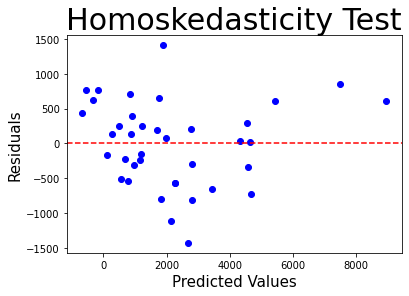

In [ ]:
fig, ax = plt.subplots()
ax.scatter(fittedvals_OLS, residuals_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 30)
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(residuals_OLS, x)
labels = ["LM-Stat", "LM p-val", "F-Stat", "F p-val"] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 5.503883498019025, 'LM p-val': 0.5987154884770902, 'F-Stat': 0.7258735711674754, 'F p-val': 0.6513003099355507}
